In [2]:
# Up-sampling effort: randomly duplicating observations from the minority class 
# to reinforce its signal

In [3]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# module for resampling
from sklearn.utils import resample

In [5]:
# os.getcwd()

In [6]:
# os.listdir(os.getcwd())

In [7]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_merged_reduced.csv")
all_param_df.shape


(31576, 357)

In [8]:
# separate classes in dataframes of success/failure
df_fail = all_param_df[all_param_df.suc_class==0]
df_succ = all_param_df[all_param_df.suc_class==1]

In [9]:
df_fail.shape

(30773, 357)

In [10]:
df_succ.shape

(803, 357)

In [12]:
# Upsaple Minority class
df_succ_upsampled = resample(df_succ, replace=True, n_samples=30000, random_state=2)

# combine failed with upsampled minority class into new dataframe
df_upsampled = pd.concat([df_fail, df_succ_upsampled])

# display new class counts
df_upsampled.suc_class.value_counts()

0    30773
1    30000
Name: suc_class, dtype: int64

In [13]:
# # reindex the new upsampled dataframe
# df_upsampled.reindex()

In [14]:
# df_upsampled

In [15]:
# # read the csv y_data file into Pandas 
# y_parm_df = pd.read_csv("reduced_data\\y_params.csv")
# y_parm_df.shape

In [16]:
# using binary classification for logistic regression
y_class = df_upsampled['suc_class']

In [17]:
y_class

1        0
2        0
3        0
4        0
5        0
        ..
4617     1
17712    1
1431     1
1198     1
1189     1
Name: suc_class, Length: 60773, dtype: int64

In [20]:
# create new X parameters df
x_data = df_upsampled.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [21]:
x_data.shape

(60773, 346)

In [22]:
#label encode the developer name

In [23]:
x_data['developer']=x_data['developer'].astype('category')

In [24]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
1,0,18189,Valve,499,90,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18189,Valve,499,90,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18189,Valve,499,90,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6672,Valve,499,90,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,18189,Valve,499,90,0,581,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#label encode the publisher name

In [26]:
x_data['publisher']=x_data['publisher'].astype('category')

In [27]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
1,0,18189,15309,499,90,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18189,15309,499,90,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18189,15309,499,90,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6672,15309,499,90,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,18189,15309,499,90,0,581,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [29]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [31]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [32]:
# Instantiate and Train model
y = y_train
X = X_train_scaled 

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

In [33]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_1.score(X_test_scaled, y_test)}")

Training Data Score: 0.5341275587441585
Testing Data Score: 0.8232855074371462


In [34]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      7631
           1       0.89      0.74      0.81      7563

    accuracy                           0.82     15194
   macro avg       0.83      0.82      0.82     15194
weighted avg       0.83      0.82      0.82     15194



In [35]:
# thinking about baseline results:
# Support is balanced due to sampling adjustments
# Percision: for no success: 78%, better for successful games: 94%
# Recall: Fraction of positives found, higher for fails than for positives
# f1 score: 84%

<AxesSubplot:>

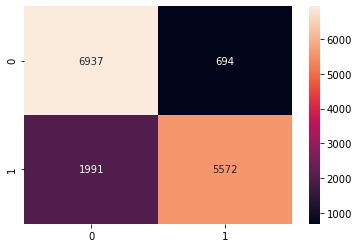

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test_scaled )
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [37]:
# Look at co-efficients for meaning

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(346,) (1, 346)
(346,)


,0,1
141,tagsingleplayer,15.242304
11,tagrpg,13.098294
12,tagmassivelymultiplayer,10.368971
3,maxprice,10.330762
62,tagopenworld,10.309767
7,tagadventure,10.047389
14,tagearlyaccess,9.939192
6,tagaction,9.074704
5,tagstrategy,8.910066
16,tagsimulation,8.876153
